In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import sys
sys.path.append('waveglow/')

from inferer import Inferer

../training/plotting_utils.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/anaconda3/envs/tt2-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/anaconda3/envs/tt2-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/anaconda3/envs/tt2-env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/anaconda3/envs/tt2-env/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/anaconda3/envs/tt2-env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612

In [2]:
tacotron_path = "outdir_grimms/checkpoint_91000" # "tacotron2_statedict.pt"
tacotron_path = "outdir_ov/checkpoint_122999" # "tacotron2_statedict.pt"
waveglow_path = "waveglow_16kHz.pt" # 'waveglow_swara_model_544000_16kHz.pt'

sample_rate = 16000

quick_inferer = Inferer(tacotron_path, waveglow_path, sample_rate)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
text_from_training_ov = "she was smiling, with her spectacles in her hand and a measure of barley in her lap."
text_from_training_grimms = "Thomson take me with you and I'll show you how to get the person's money."
text_dino = "six hundred years ago last Wednesday, the dinosaurs died out."
text_squarespace = "hello, today I am here to talk to you about squarespace."
text_jeff = "my name Jeff."
text_pink = "sometimes, I find the pink ones to be the most enticing."

phrase = text_from_training_grimms

In [4]:
# Infering the data
phrase_audio_data = quick_inferer.infer(phrase, all_inference_data=True)

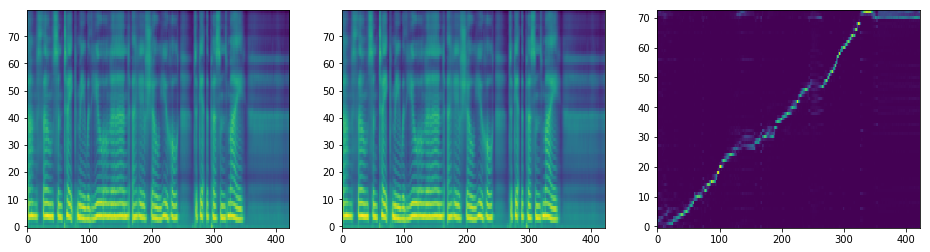

In [5]:
# plotting mels and alignments
quick_inferer.plot_data((phrase_audio_data["mel_outputs_numpy"],
                         phrase_audio_data["mel_outputs_postnet_numpy"],
                         phrase_audio_data["alignments_numpy_T"]))

In [6]:
# raw numpy audio
ipd.Audio(phrase_audio_data["audio_numpy"], rate=sample_rate)

In [7]:
# denoised numpy audio
ipd.Audio(phrase_audio_data["denoised_audio_numpy"], rate=sample_rate)